<a href="https://colab.research.google.com/github/yyavl/yyavl/blob/main/Copy_of_FinBert_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note book by Praveen Purohit.
https://www.linkedin.com/in/purohit/

We use a Kaggle dataset which is a collection of financial news to do our sentiment analysis. https://www.kaggle.com/notlucasp/financial-news-headlines

In [ ]:
# Use the Colab data_table feature to see dataframes in a more usable format
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
#From Kaggle account->download API key. Upload it here so that you can access the Kaggle dataset directly
from google.colab import files
files.upload()

{}

In [ ]:
#create a kaggle directory
! mkdir ~/.kaggle
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/
#add permission to json file
! chmod 600 ~/.kaggle/kaggle.json
# From Kaggle->dataset->three dots->Copy API command
#https://www.kaggle.com/notlucasp/financial-news-headlines
! kaggle datasets download -d notlucasp/financial-news-headlines
! unzip financial-news-headlines.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/notlucasp/financial-news-headlines
License(s): CC0-1.0
financial-news-headlines.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  financial-news-headlines.zip
replace cnbc_headlines.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
#Read first 50 rows to limit RAM usage in colab
df = pd.read_csv("reuters_headlines.csv", nrows=50)
df_array = np.array(df)
df_list = list(df_array[:,0])

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
#tokenize text to be sent to model
inputs = tokenizer(df_list, padding = True, truncation = True, return_tensors='pt')
outputs = model(**inputs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

In [ ]:
predictions

tensor([[0.0684, 0.0107, 0.9209],
        [0.0106, 0.9549, 0.0345],
        [0.0205, 0.7324, 0.2470],
        [0.0287, 0.0845, 0.8869],
        [0.1899, 0.7077, 0.1024],
        [0.0452, 0.0602, 0.8946],
        [0.0893, 0.0132, 0.8975],
        [0.0404, 0.8503, 0.1093],
        [0.0166, 0.6618, 0.3216],
        [0.7140, 0.2522, 0.0339],
        [0.0684, 0.1157, 0.8159],
        [0.4948, 0.3409, 0.1643],
        [0.0182, 0.7533, 0.2285],
        [0.0317, 0.5924, 0.3759],
        [0.8255, 0.0899, 0.0845],
        [0.0827, 0.8199, 0.0974],
        [0.0144, 0.9166, 0.0690],
        [0.8359, 0.0089, 0.1551],
        [0.0512, 0.0992, 0.8495],
        [0.0125, 0.8532, 0.1343],
        [0.0406, 0.0975, 0.8620],
        [0.7004, 0.1003, 0.1993],
        [0.0524, 0.7639, 0.1836],
        [0.0188, 0.7595, 0.2217],
        [0.1449, 0.0470, 0.8081],
        [0.0887, 0.8853, 0.0260],
        [0.1054, 0.0119, 0.8827],
        [0.0265, 0.7750, 0.1985],
        [0.0108, 0.9114, 0.0778],
        [0.767

In [ ]:
model.config.id2label

#Tweet #Positive #Negative #Neutral
positive = predictions[:, 0].tolist()
negative = predictions[:, 1].tolist()
neutral = predictions[:, 2].tolist()

table = {'Headline':df_list,
         "Positive":positive,
         "Negative":negative,
         "Neutral":neutral}

df2 = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral"])

In [ ]:
df2

,Headline,Positive,Negative,Neutral
0,TikTok considers London and other locations fo...,0.068411,0.010720,0.920870
1,Disney cuts ad spending on Facebook amid growi...,0.010635,0.954850,0.034515
2,Trail of missing Wirecard executive leads to B...,0.020533,0.732447,0.247019
3,Twitter says attackers downloaded data from up...,0.028682,0.084450,0.886868
4,U.S. Republicans seek liability protections as...,0.189856,0.707712,0.102432
5,Wall Street Week Ahead: Fund managers navigate...,0.045176,0.060204,0.894620
6,Take Five: Hoping for that V-shape in earnings,0.089275,0.013235,0.897491
7,Evictions nearly back to pre-pandemic levels i...,0.040433,0.850311,0.109256
8,Google bans ads on coronavirus conspiracy theo...,0.016593,0.661839,0.321567
9,"Flight to suburbs boosts U.S. homebuilding, bu...",0.713985,0.252158,0.033857


In [ ]:
# Assign label based on highest probability
df2['Label'] = df2[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)
df2

,Headline,Positive,Negative,Neutral,Label
0,TikTok considers London and other locations fo...,0.068411,0.010720,0.920870,Neutral
1,Disney cuts ad spending on Facebook amid growi...,0.010635,0.954850,0.034515,Negative
2,Trail of missing Wirecard executive leads to B...,0.020533,0.732447,0.247019,Negative
3,Twitter says attackers downloaded data from up...,0.028682,0.084450,0.886868,Neutral
4,U.S. Republicans seek liability protections as...,0.189856,0.707712,0.102432,Negative
5,Wall Street Week Ahead: Fund managers navigate...,0.045176,0.060204,0.894620,Neutral
6,Take Five: Hoping for that V-shape in earnings,0.089275,0.013235,0.897491,Neutral
7,Evictions nearly back to pre-pandemic levels i...,0.040433,0.850311,0.109256,Negative
8,Google bans ads on coronavirus conspiracy theo...,0.016593,0.661839,0.321567,Negative
9,"Flight to suburbs boosts U.S. homebuilding, bu...",0.713985,0.252158,0.033857,Positive


In [ ]:
predicted_labels = df2['Label']

from collections import Counter

# Count the occurrences of each label
label_counts = Counter(predicted_labels)

# Print the distribution of predicted labels
print("Distribution of Predicted Labels:")
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")

Distribution of Predicted Labels:
Label: Neutral, Count: 18
Label: Negative, Count: 23
Label: Positive, Count: 9


In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

X = df2[['Positive', 'Negative', 'Neutral']]

# Compute silhouette score
silhouette_avg = silhouette_score(X, predicted_labels)

# Compute silhouette sample values for each data point
sample_silhouette_values = silhouette_samples(X, predicted_labels)

print("Silhouette Score:", silhouette_avg)
print("Silhouette Sample Values:", sample_silhouette_values)

Silhouette Score: 0.8164983566571365
Silhouette Sample Values: [0.89006113 0.83281712 0.80101034 0.89009547 0.70334176 0.89993216
 0.89661415 0.86832478 0.67302539 0.69739649 0.86852355 0.40590218
 0.82573465 0.52033143 0.82353821 0.84684968 0.85556276 0.82281452
 0.88863922 0.87108501 0.88949083 0.8038018  0.84564216 0.83282192
 0.85564049 0.8206098  0.89284661 0.85033677 0.85832127 0.83991268
 0.82165022 0.87731266 0.71669949 0.83405524 0.78751009 0.85352226
 0.77166095 0.81069844 0.82951984 0.82481657 0.87518372 0.84802966
 0.86657738 0.89695444 0.90479971 0.64249855 0.67080826 0.85576236
 0.89481739 0.87101625]


In [ ]:
# Convert cluster labels to numerical labels
label_dict = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
numeric_labels = np.array([label_dict[label] for label in predicted_labels])

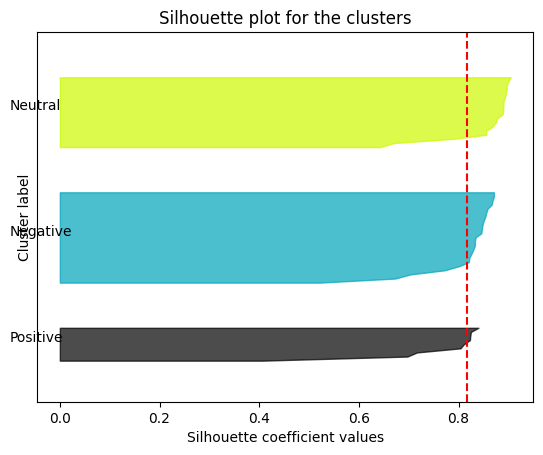

In [ ]:
import matplotlib.pyplot as plt

# Create a plot
fig, ax = plt.subplots()

# Set ylim based on the number of clusters
ax.set_ylim([0, len(predicted_labels) + (len(set(numeric_labels)) + 1) * 10])

y_lower = 10
for i, label in enumerate(set(predicted_labels)):
    # Aggregate the silhouette scores for samples belonging to cluster label
    ith_cluster_silhouette_values = sample_silhouette_values[numeric_labels == label_dict[label]]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(set(numeric_labels)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster label at the middle
    ax.text(-0.1, y_lower + 0.5 * size_cluster_i, label)

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette plot for the clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Clear the y-axis labels / ticks
ax.set_yticks([])

plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances

data_array = X.values

# Calculate cluster centroids
cluster_centroids = np.array([np.mean(data_array[np.array(numeric_labels) == i], axis=0) for i in range(len(set(numeric_labels)))])

# Calculate pairwise distances between cluster centroids
cluster_distances = pairwise_distances(cluster_centroids, metric='euclidean')

# Initialize Davies-Bouldin index
db_index = 0.0

# Iterate over each cluster
for i in range(len(cluster_centroids)):
    # Compute the average distance from the centroid of cluster i to all points in cluster i
    avg_distance_i = np.mean(pairwise_distances([cluster_centroids[i]], data_array[np.array(numeric_labels) == i], metric='euclidean'))

    # Compute the average similarity of cluster i to other clusters
    max_similarity = 0.0
    for j in range(len(cluster_centroids)):
        if i != j:
            similarity = (avg_distance_i + np.mean(pairwise_distances([cluster_centroids[i]], [cluster_centroids[j]], metric='euclidean'))) / cluster_distances[i, j]
            if similarity > max_similarity:
                max_similarity = similarity

    # Accumulate the Davies-Bouldin index
    db_index += max_similarity

# Normalize the Davies-Bouldin index
db_index /= len(cluster_centroids)

print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 1.1258645488801962


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

def dunn_index(X, numeric_labels):
    """
    Compute the Dunn Index for a given clustering.

    Parameters:
    - data: The dataset, numpy array of shape (n_samples, n_features).
    - labels: Cluster labels assigned to each data point.

    Returns:
    - dunn_index: The computed Dunn Index.
    """
    # Compute pairwise distances between data points
    distances = pairwise_distances(X)

    # Compute minimum distance between points in different clusters
    min_intercluster_distance = np.min([[np.min(distances[np.where(numeric_labels == i)][:, np.where(numeric_labels == j)])
                                         for j in np.unique(numeric_labels) if j != i]
                                        for i in np.unique(numeric_labels)])

    # Compute maximum diameter of clusters
    max_intracluster_distance = np.max([np.max(distances[np.where(numeric_labels == i)][:, np.where(numeric_labels == i)])
                                         for i in np.unique(numeric_labels)])

    # Compute Dunn Index
    dunn_index = min_intercluster_distance / max_intracluster_distance

    return dunn_index

# Compute Dunn Index
dunn = dunn_index(X, numeric_labels)
print("Dunn Index:", dunn)


Dunn Index: 0.9341231049177531
